In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import utils as u
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import result_gen_utils as ru
from scipy.stats import norm

In [2]:
# get the file names
train_files, test_files = u.train_test_half_vids('/data/home/shruti/voxceleb/vgg/leaders/')

before 4105
after 3739


In [4]:
u.save_obj(test_files, '.', 'test_files')

# results

1) The fabnet explanation in the bullet point, point 1 needs more explanation.

2) The fabnet smilarity matters because we might not have the same behavior. The VGG threshold should, however, have been introduced in a more principled way.. First show explanability of the faceswap. VGG similarity to my top-1 matters a lot. VGG simialrity has an issue of in-between similarity but not FAb-Net

3) say faceswap and not generic deep fakes

4) Have the T_v explanation of geodesic path explation should go in the authentication section.

5) VGG or FabNet only as baselines


In [2]:
def read_results(in_df_name):
    
    in_df = pd.read_pickle(in_df_name)
    in_df = in_df.reset_index()
    return in_df

In [3]:
result_dfs = {}

In [4]:
result_dfs['CDF_real_100'] = read_results('result_csv/CDF_real_100_alldist.csv')
result_dfs['CDF_fake_100'] = read_results('result_csv/CDF_fake_100_alldist.csv')

In [3]:


result_dfs['ldr_real_100'] = read_results('result_csv/ldr_real_100_alldist.csv')
result_dfs['ldr_fake_100'] = read_results('result_csv/ldr_fake_100_alldist.csv')
result_dfs['FF_real_100'] = read_results('result_csv/FF_real_100_alldist.csv')
result_dfs['FF_fake_100'] = read_results('result_csv/FF_fake_100_alldist.csv')
result_dfs['GG_real_100'] = read_results('result_csv/GG_real_100_alldist.csv')
result_dfs['GG_fake_100'] = read_results('result_csv/GG_fake_100_alldist.csv')
result_dfs['DFDC_real_100'] = read_results('result_csv/DFDC_real_100_alldist.csv')
result_dfs['DFDC_fake_100'] = read_results('result_csv/DFDC_fake_100_alldist.csv')
result_dfs['SJ_real_100'] = read_results('result_csv/SJ_real_100_alldist.csv')
result_dfs['SJ_fake_100'] = read_results('result_csv/SJ_fake_100_alldist.csv')
result_dfs['CDF_real_100'] = read_results('result_csv/CDF_real_100_alldist.csv')
result_dfs['CDF_fake_100'] = read_results('result_csv/CDF_fake_100_alldist.csv')


In [6]:
result_dfs['ldr_real_100_comp'] = read_results('result_csv/ldr_real_100_alldist_comp.csv')
result_dfs['ldr_fake_100_comp'] = read_results('result_csv/ldr_fake_100_alldist_comp.csv')
result_dfs['FF_real_100_comp'] = read_results('result_csv/FF_real_100_alldist_comp.csv')
result_dfs['FF_fake_100_comp'] = read_results('result_csv/FF_fake_100_alldist_comp.csv')
result_dfs['GG_real_100_comp'] = read_results('result_csv/GG_real_100_alldist_comp.csv')
result_dfs['GG_fake_100_comp'] = read_results('result_csv/GG_fake_100_alldist_comp.csv')
result_dfs['DFDC_real_100_comp'] = read_results('result_csv/DFDC_real_100_alldist_comp.csv')
result_dfs['DFDC_fake_100_comp'] = read_results('result_csv/DFDC_fake_100_alldist_comp.csv')

In [5]:
# assign behavior ids 
for k in result_dfs.keys():
    
    result_dfs[k]['actualLabel_behav'] = ru.get_behav_id(result_dfs[k])

### discrepancy accuracy

In [ ]:
def get_percent_in_df(in_df):
    
    face_id = np.array(in_df['actualLabel_vgg'])
    behav_id = np.array(in_df['actualLabel_behav'])
    vgg_id = ru.get_pred_label(in_df['sim_vgg'])
    fab_id = ru.get_pred_label(in_df['sim_fab'])
    
    out_dict = {}
    out_dict['consistent'] = len(np.argwhere(vgg_id == fab_id).ravel())/len(vgg_id)
    out_dict['vgg_face'] = len(np.argwhere(vgg_id == face_id).ravel())/len(vgg_id)
    out_dict['vgg_behav'] = len(np.argwhere(vgg_id == behav_id).ravel())/len(vgg_id)
    out_dict['vgg_other'] = len(np.argwhere((vgg_id != behav_id) & (vgg_id != face_id) ).ravel())/len(vgg_id)
    
    out_dict['fab_face'] = len(np.argwhere(fab_id == face_id).ravel())/len(vgg_id)
    out_dict['fab_behav'] = len(np.argwhere(fab_id == behav_id).ravel())/len(vgg_id)
    out_dict['fab_other'] = len(np.argwhere((fab_id != behav_id) & (fab_id != face_id) ).ravel())/len(vgg_id)
    
    return out_dict

# a plot with ids on the x axis, y axis is vgg/fabnet
def print_result_row(in_df, r_or_f):
    
    out_dict = get_percent_in_df(in_df)
    
    if r_or_f == 'fake':
        print('{0}\t|\t{1:0.2f}\t{2:0.2f}\t{3:0.2f}\t|\t{4:0.2f}\t{5:0.2f}\t{6:0.2f}\t|\t{7:0.2f}'.
              format(r_or_f, out_dict['vgg_face'], out_dict['vgg_behav'], out_dict['vgg_other'],
                     out_dict['fab_face'], out_dict['fab_behav'], out_dict['fab_other'], out_dict['consistent']))
        print('---------------------------------------------------------------------------------------------------')
    else:
        print('{0}\t|\t{1:0.2f}\tNA\t{2:0.2f}\t|\tNA\t{3:0.2f}\t{4:0.2f}\t|\t{5:0.2f}'.
              format(r_or_f, out_dict['vgg_face'], out_dict['vgg_other'],
                     out_dict['fab_face'], out_dict['fab_other'], out_dict['consistent']))
        print('---------------------------------------------------------------------------------------------------')
        
        

def result_per_db():
    
    print('Leaders')
    
    print('\t\t\tVGG\t\t\t\tFabnet\t\t\tConsistent\n')
    print('\t\tFaceId\tBehvId\tOther\t\tFaceId\tBehvId\tOther\n')
    print_result_row(result_dfs['ldr_real_100'], 'real')
    print_result_row(result_dfs['ldr_fake_100'], 'fake')

    print('FaceForensic \n')
    print_result_row(result_dfs['FF_real_100'], 'real')
    print_result_row(result_dfs['FF_fake_100'], 'fake')

    print('Google \n')
    print_result_row(result_dfs['GG_real_100'], 'real')
    print_result_row(result_dfs['GG_fake_100'], 'fake')
    
    print('DFDC \n')
    print_result_row(result_dfs['DFDC_real_100'], 'real')
    print_result_row(result_dfs['DFDC_fake_100'], 'fake')
    
    print('Jennifer \n')
    print_result_row(result_dfs['SJ_real_100'], 'real')
    print_result_row(result_dfs['SJ_fake_100'], 'fake')
    
    
result_per_db()

## compute individual distance from face and behav id or agnostic

In [6]:

# get idividual distances
for k in result_dfs.keys():
    
    result_dfs[k]['vgg_behav_id_sim'] = ru.get_vgg_behav_id(result_dfs[k])
    result_dfs[k]['vgg_face_id_sim'] = ru.get_vgg_face_id(result_dfs[k])
    result_dfs[k]['fab_face_id_sim'] = ru.get_fab_face_id(result_dfs[k])
    result_dfs[k]['fab_behav_id_sim'] = ru.get_fab_behav_id(result_dfs[k])
    result_dfs[k]['only_fab'] = ru.get_max_fab(result_dfs[k])
    result_dfs[k]['only_vgg'] = ru.get_max_vgg(result_dfs[k])
    result_dfs[k]['scaleMaxVGGFab_fab075'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.8, 0.0001), 
                                                                       mu_sigFab=(0.6, 0.0001))


In [ ]:
# get idividual distances
for k in result_dfs.keys():
    
    result_dfs[k]['scaleMaxVGGFab_fab075'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.8, 0.0001), 
                                                                       mu_sigFab=(0.6, 0.0001))

In [3]:
for k in result_dfs.keys():
    result_dfs[k]['scaleMaxVGGFab_fab05'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.89, 0.0001), 
                                                                       mu_sigFab=(0.5, 0.0001))
    result_dfs[k]['scaleMaxVGGFab_fab06'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.89, 0.0001), 
                                                                       mu_sigFab=(0.6, 0.0001))
    result_dfs[k]['scaleMaxVGGFab_fab07'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.89, 0.0001), 
                                                                       mu_sigFab=(0.7, 0.0001))
    result_dfs[k]['scaleMaxVGGFab_fab075'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.89, 0.0001), 
                                                                       mu_sigFab=(0.75, 0.0001))
    result_dfs[k]['scaleMaxVGGFab_fab078'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.89, 0.0001), 
                                                                       mu_sigFab=(0.78, 0.0001))
    result_dfs[k]['scaleMaxVGGFab_fab08'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.89, 0.0001), 
                                                                       mu_sigFab=(0.8, 0.0001))
    result_dfs[k]['scaleMaxVGG091_fab08'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.91, 0.0001), 
                                                                       mu_sigFab=(0.8, 0.0001))
    result_dfs[k]['scaleMaxVGG084_fab072'] = ru.get_comb_Or_scaleMaxVGGFab(result_dfs[k], 
                                                                       mu_sigVGG=(0.84, 0.0001), 
                                                                       mu_sigFab=(0.72, 0.0001))
    

In [ ]:
for k in result_dfs.keys():
    result_dfs[k]['consistency'] = ru.get_consistency(result_dfs[k])
    

In [ ]:
u.save_obj(result_dfs, 'result_csv', 'all_results' )

## plot individual distance from face and behav id or agnostic

In [4]:
result_dfs = u.load_obj('result_csv', 'all_results' )

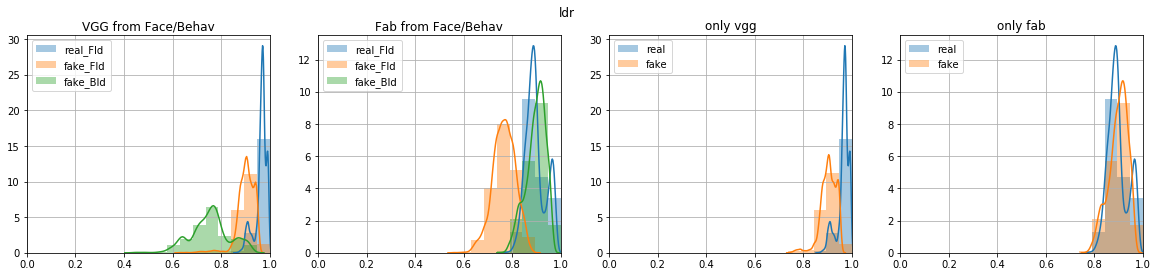

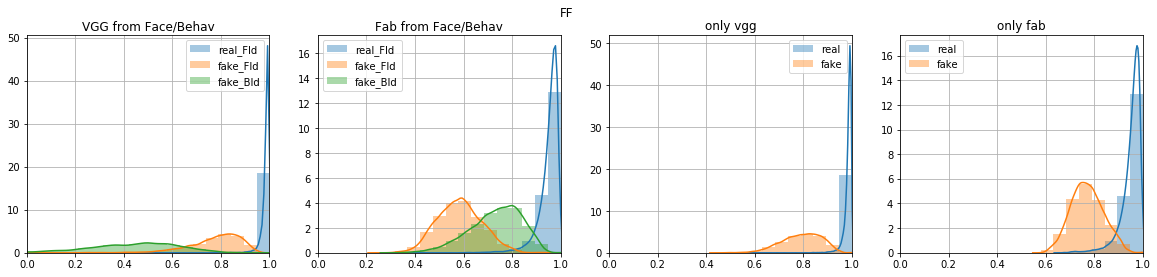

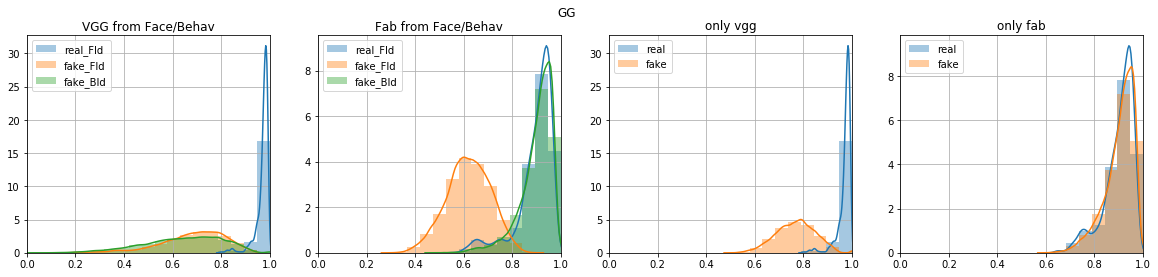

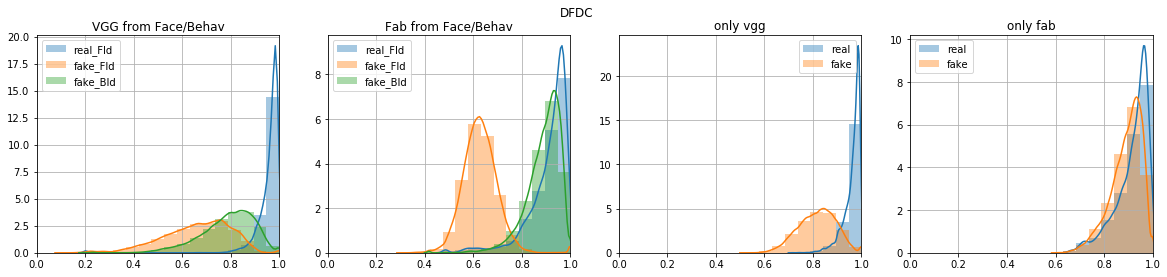

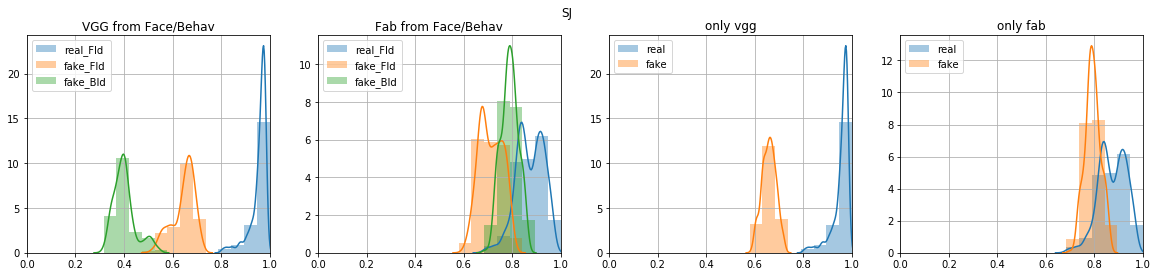

In [5]:

def plot_distribution(in_dict, in_keys, in_feat_nms, in_leg, title, ax):
    
    bins = np.linspace(0, 1, 20)
    for i in range(len(in_keys)):
        
        cur_arr = np.array(in_dict[in_keys[i]][in_feat_nms[i]].dropna())
        if np.std(cur_arr) == 0:
            cur_arr = cur_arr + np.random.normal(loc=0, scale=0.01, size=cur_arr.shape)
        sns.distplot(cur_arr, 
                     bins=bins, label=in_leg[i], ax=ax)
        ax.legend()
        ax.set_title(title)
        ax.set_xlim([0.0, 1.0])
        ax.grid(b=True)
        

# plot the distances
def plot_one_row(in_pref):
    
    _, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    real_key = in_pref + '_real_100'
    fake_key = in_pref + '_fake_100'
    
    plot_distribution(result_dfs, 
                      [real_key, fake_key, fake_key], 
                      ['vgg_face_id_sim', 'vgg_face_id_sim', 'vgg_behav_id_sim'], 
                      ['real_FId', 'fake_FId', 'fake_BId'], 'VGG from Face/Behav', ax=ax[0])
    plot_distribution(result_dfs, 
                      [real_key, fake_key, fake_key], 
                      ['fab_face_id_sim', 'fab_face_id_sim', 'fab_behav_id_sim'], 
                      ['real_FId', 'fake_FId', 'fake_BId'], 'Fab from Face/Behav', ax=ax[1])
    plot_distribution(result_dfs, [real_key, fake_key], 
                      ['only_vgg', 'only_vgg'], ['real', 'fake'], 
                      'only vgg', ax=ax[2])
    plot_distribution(result_dfs, 
                      [real_key, fake_key], 
                      ['only_fab', 'only_fab'], 
                      ['real', 'fake'], 
                      'only fab', ax=ax[3])
    
    plt.suptitle(in_pref)
    plt.show()
    
#plot_one_row('ldr')
#plot_one_row('FF')
#plot_one_row('GG')
#plot_one_row('DFDC')
#plot_one_row('SJ')

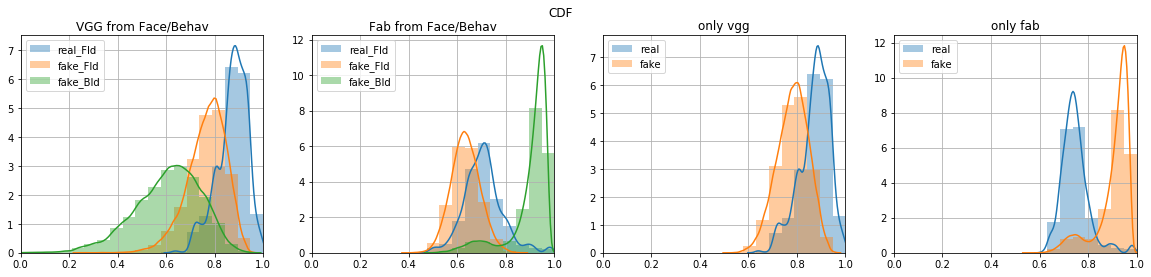

In [7]:

def plot_distribution(in_dict, in_keys, in_feat_nms, in_leg, title, ax):
    
    bins = np.linspace(0, 1, 20)
    for i in range(len(in_keys)):
        
        cur_arr = np.array(in_dict[in_keys[i]][in_feat_nms[i]].dropna())
        if np.std(cur_arr) == 0:
            cur_arr = cur_arr + np.random.normal(loc=0, scale=0.01, size=cur_arr.shape)
        sns.distplot(cur_arr, 
                     bins=bins, label=in_leg[i], ax=ax)
        ax.legend()
        ax.set_title(title)
        ax.set_xlim([0.0, 1.0])
        ax.grid(b=True)
        

# plot the distances
def plot_one_row(in_pref):
    
    _, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    real_key = in_pref + '_real_100'
    fake_key = in_pref + '_fake_100'
    
    plot_distribution(result_dfs, 
                      [real_key, fake_key, fake_key], 
                      ['vgg_face_id_sim', 'vgg_face_id_sim', 'vgg_behav_id_sim'], 
                      ['real_FId', 'fake_FId', 'fake_BId'], 'VGG from Face/Behav', ax=ax[0])
    plot_distribution(result_dfs, 
                      [real_key, fake_key, fake_key], 
                      ['fab_face_id_sim', 'fab_face_id_sim', 'fab_behav_id_sim'], 
                      ['real_FId', 'fake_FId', 'fake_BId'], 'Fab from Face/Behav', ax=ax[1])
    plot_distribution(result_dfs, [real_key, fake_key], 
                      ['only_vgg', 'only_vgg'], ['real', 'fake'], 
                      'only vgg', ax=ax[2])
    plot_distribution(result_dfs, 
                      [real_key, fake_key], 
                      ['only_fab', 'only_fab'], 
                      ['real', 'fake'], 
                      'only fab', ax=ax[3])
    
    plt.suptitle(in_pref)
    plt.show()
    


plot_one_row('CDF')



# get the DFDC sample fake videos

In [38]:
temp = result_dfs['DFDC_fake_100'].loc[:, ['fileName', 'vgg_face_id_sim', 'fab_behav_id_sim']].copy()

In [41]:
temp['diff'] = np.array(temp['vgg_face_id_sim']) - np.array(temp['fab_behav_id_sim'])

In [ ]:

display(temp.loc[temp['vgg_face_id_sim'] < temp['fab_behav_id_sim'], :].sort_values(by='diff', ascending=True).iloc[
    1000:, :])


## print accuracies

In [10]:

# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_row(in_dict, r_or_f, feat_nm, cur_thres=None, cutoff = 0.01):
    
    if r_or_f == 'real':
        keys = ['CDF_real_100']
    else:
        keys = ['CDF_real_100']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = cutoff)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    
def result_per_measure():
    
    print('\t\t\t2% reject')
    print('\t\tCeleb-DF\n')
    print('Only Fab', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_fab', cutoff = 0.02)
    print_sim_acc_row(result_dfs, 'fake', 'only_fab', cur_thres)
    print('\n')
    print('Only VGG', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_vgg', cutoff = 0.02)
    print_sim_acc_row(result_dfs, 'fake', 'only_vgg', cur_thres)
    print('\n')
    print('Max VGG 0.91 Fab 0.75', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGGFab_fab075', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGGFab_fab075', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    
result_per_measure()

			2% reject
		Celeb-DF

Only Fab : 0.65
real|	0.98 (0.00) 
---------------------------------------------------------------------------------------------------

fake|	0.02 (0.00) 
---------------------------------------------------------------------------------------------------


Only VGG : 0.72
real|	0.98 (0.00) 
---------------------------------------------------------------------------------------------------

fake|	0.02 (0.00) 
---------------------------------------------------------------------------------------------------


Max VGG 0.91 Fab 0.75 
real|	0.33 (0.59) 
---------------------------------------------------------------------------------------------------

fake|	0.67 (0.59) 
---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------



In [58]:
# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_row(in_dict, r_or_f, feat_nm, cur_thres=None, cutoff = 0.01):
    
    if r_or_f == 'real':
        keys = ['ldr_real_100',
                'FF_real_100',
                'GG_real_100',
                'DFDC_real_100', 
                'SJ_real_100']
    else:
        keys = ['ldr_fake_100',
                'FF_fake_100',
                'GG_fake_100',
                'DFDC_fake_100', 
                'SJ_fake_100']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = cutoff)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    
def result_per_measure():
    
    print('\t\t\t1% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('Only Fab', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_fab', cutoff = 0.01)
    print_sim_acc_row(result_dfs, 'fake', 'only_fab', cur_thres)
    print('\n')
    print('Only VGG', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_vgg', cutoff = 0.01)
    print_sim_acc_row(result_dfs, 'fake', 'only_vgg', cur_thres)
    print('\n')
    print('Max VGG 0.84 Fab 0.72', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG084_fab072', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG084_fab072', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t2% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('Only Fab', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_fab', cutoff = 0.02)
    print_sim_acc_row(result_dfs, 'fake', 'only_fab', cur_thres)
    print('\n')
    print('Only VGG', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_vgg', cutoff = 0.02)
    print_sim_acc_row(result_dfs, 'fake', 'only_vgg', cur_thres)
    print('\n')
    print('Max VGG 0.88 Fab 0.75', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGGFab_fab075', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGGFab_fab075', cur_thres = 0.0001)
    print('\n---------------------------------------------------------------------------------------------------\n')
    
    print('\t\t\t5% reject')
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('Only Fab', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_fab', cutoff = 0.05)
    print_sim_acc_row(result_dfs, 'fake', 'only_fab', cur_thres)
    print('\n')
    print('Only VGG', end=' ')
    cur_thres = print_sim_acc_row(result_dfs, 'real', 'only_vgg', cutoff = 0.05)
    print_sim_acc_row(result_dfs, 'fake', 'only_vgg', cur_thres)
    print('\n')
    print('Max VGG 0.91 Fab 0.8', end=' ')
    print_sim_acc_row(result_dfs, 'real', 'scaleMaxVGG091_fab08', cur_thres = 0.0001)
    print_sim_acc_row(result_dfs, 'fake', 'scaleMaxVGG091_fab08', cur_thres = 0.0001)


In [59]:
result_per_measure()

			1% reject
		ldr		FF		GG		DFDC		SJ

Only Fab : 0.72
real|	1.00 (0.00) 	1.00 (0.00) 	0.98 (0.00) 	0.98 (0.00) 	0.99 (0.00) 
---------------------------------------------------------------------------------------------------

fake|	0.00 (0.00) 	0.23 (0.00) 	0.01 (0.00) 	0.01 (0.00) 	0.00 (0.00) 
---------------------------------------------------------------------------------------------------


Only VGG : 0.84
real|	1.00 (0.00) 	1.00 (0.00) 	0.99 (0.00) 	0.99 (0.00) 	0.97 (0.00) 
---------------------------------------------------------------------------------------------------

fake|	0.04 (0.00) 	0.69 (0.00) 	0.81 (0.00) 	0.59 (0.00) 	1.00 (0.00) 
---------------------------------------------------------------------------------------------------


Max VGG 0.84 Fab 0.72 
real|	1.00 (0.00) 	0.99 (0.00) 	0.94 (0.02) 	0.93 (0.02) 	0.98 (0.01) 
---------------------------------------------------------------------------------------------------

fake|	0.96 (0.00) 	0.98 (0.23) 	0.90 (0.01) 	

In [60]:
# plot the dataset accuracies
# a plot with ids on the x axis, y axis is vgg/fabnet
def plot_sim_acc(in_dict, r_or_fs, feat_nm, cur_thres, ax):
    
    dataset_nm = ['ldr', 'FF', 'GG', 'DFDC', 'SJ']
    avg_acc = {}
    avg_opt = {}
    
    for k in dataset_nm:
        avg_acc[k] = 0
        avg_opt[k] = 0
    
    for r_or_f in r_or_fs:
        
        for k in dataset_nm:
            
            if r_or_f == 'real':
                cur_key = f'{k}_real_100'
            else:
                cur_key = f'{k}_fake_100'
        
            cur_acc, cur_optout = ru.compute_accuracy(in_dict[cur_key], feat_nm, cur_thres)
            if r_or_f == 'real':
                avg_acc[k] = avg_acc[k] + cur_acc
            else:
                avg_acc[k] = avg_acc[k] + (1-cur_acc)
            avg_opt[k] = avg_opt[k] + cur_optout
        
    # plot the data points
    ax[0].plot(np.arange(len(dataset_nm)), [avg_acc[k]/len(r_or_fs) for k in dataset_nm], label=feat_nm)
    ax[0].set_xticks(np.arange(len(dataset_nm)))
    ax[0].set_xticklabels(dataset_nm, rotation=90)
    ax[0].legend()
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim([0, 1])
    ax[0].grid(b=True)
    
    ax[1].plot(np.arange(len(dataset_nm)), [avg_opt[k]/len(r_or_fs) for k in dataset_nm], label=feat_nm)
    ax[1].set_xticks(np.arange(len(dataset_nm)))
    ax[1].set_xticklabels(dataset_nm, rotation=90)
    ax[1].legend()
    ax[1].set_ylabel('OptOut')
    ax[1].set_ylim([0, 1])
    ax[1].grid(b=True)

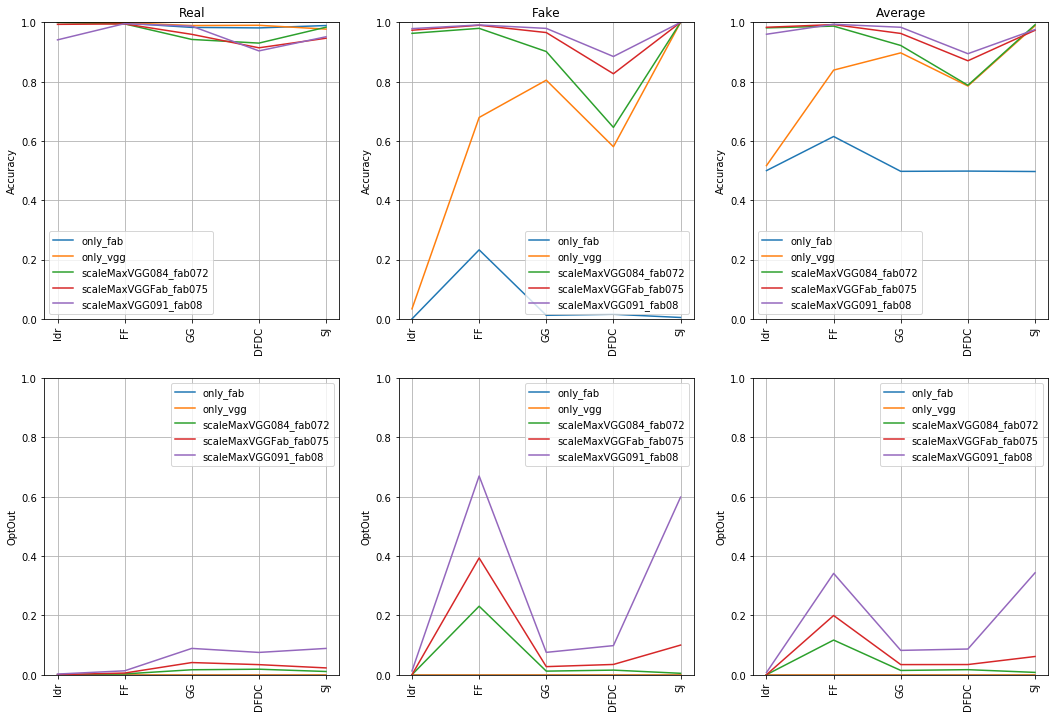

In [61]:
_, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))


plot_sim_acc(result_dfs, ['real'], 'only_fab', cur_thres=0.72, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'only_fab', cur_thres=0.72, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'only_fab', cur_thres=0.72, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'only_vgg', cur_thres=0.84, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'only_vgg', cur_thres=0.84, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'only_vgg', cur_thres=0.84, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'scaleMaxVGG084_fab072', cur_thres=0.0001, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'scaleMaxVGG084_fab072', cur_thres=0.0001, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'scaleMaxVGG084_fab072', cur_thres=0.0001, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'scaleMaxVGGFab_fab075', cur_thres=0.0001, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'scaleMaxVGGFab_fab075', cur_thres=0.0001, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'scaleMaxVGGFab_fab075', cur_thres=0.0001, ax=ax[:, 2])

plot_sim_acc(result_dfs, ['real'], 'scaleMaxVGG091_fab08', cur_thres=0.0001, ax=ax[:, 0])
plot_sim_acc(result_dfs, ['fake'], 'scaleMaxVGG091_fab08', cur_thres=0.0001, ax=ax[:, 1])
plot_sim_acc(result_dfs, ['real','fake'], 'scaleMaxVGG091_fab08', cur_thres=0.0001, ax=ax[:, 2])

ax[0, 0].set_title('Real')
ax[0, 1].set_title('Fake')
ax[0, 2].set_title('Average')
plt.show()

# compression


In [15]:
# a plot with ids on the x axis, y axis is vgg/fabnet
def print_sim_acc_comp(in_dict, r_or_f, feat_nm, cur_thres=None):
    
    if r_or_f == 'real':
        keys = ['ldr_real_100_comp',
                'FF_real_100_comp',
                'GG_real_100_comp',
                'DFDC_real_100_comp']
    else:
        keys = ['ldr_fake_100_comp',
                'FF_fake_100_comp',
                'GG_fake_100_comp',
                'DFDC_fake_100_comp']
    
    if cur_thres==None:
        cur_thres = ru.compute_threshold(in_dict, keys, feat_nm, n=1000, cutoff = 0.01)
        print(f': {cur_thres:0.2f}', end='')
    
    print('')
    print(r_or_f, end='|')
    for k in keys:
        cur_acc, cur_optout = ru.compute_accuracy(in_dict[k], feat_nm, cur_thres)
        if r_or_f == 'real':
            print(f'\t{cur_acc:0.2f} ({cur_optout:0.2f})', end=' ')
        else:
            print(f'\t{(1-cur_acc):0.2f} ({cur_optout:0.2f})', end=' ')
                
    
    print('\n---------------------------------------------------------------------------------------------------')
    return cur_thres


    
def result_comp():
    
    print('\t\tldr\t\tFF\t\tGG\t\tDFDC\t\tSJ\n')
    print('\n')
    print('Max VGG 0.84 Fab 0.72', end=' ')
    print_sim_acc_comp(result_dfs, 'real', 'scaleMaxVGG084_fab072', cur_thres = 0.0001)
    print_sim_acc_comp(result_dfs, 'fake', 'scaleMaxVGG084_fab072', cur_thres = 0.0001)
    print('\n')
    print('Max VGG 0.88 Fab 0.75', end=' ')
    print_sim_acc_comp(result_dfs, 'real', 'scaleMaxVGGFab_fab075', cur_thres = 0.0001)
    print_sim_acc_comp(result_dfs, 'fake', 'scaleMaxVGGFab_fab075', cur_thres = 0.0001)
    print('\n')
    print('Max VGG 0.91 Fab 0.8', end=' ')
    print_sim_acc_comp(result_dfs, 'real', 'scaleMaxVGG091_fab08', cur_thres = 0.0001)
    print_sim_acc_comp(result_dfs, 'fake', 'scaleMaxVGG091_fab08', cur_thres = 0.0001)

result_comp()



		ldr		FF		GG		DFDC		SJ



Max VGG 0.84 Fab 0.72 
real|	1.00 (0.00) 	0.98 (0.00) 	0.94 (0.02) 	0.85 (0.01) 
---------------------------------------------------------------------------------------------------

fake|	0.92 (0.00) 	0.99 (0.30) 	0.91 (0.02) 	0.74 (0.02) 
---------------------------------------------------------------------------------------------------


Max VGG 0.88 Fab 0.75 
real|	0.95 (0.00) 	0.94 (0.01) 	0.94 (0.05) 	0.78 (0.02) 
---------------------------------------------------------------------------------------------------

fake|	0.96 (0.00) 	0.99 (0.47) 	0.97 (0.04) 	0.91 (0.06) 
---------------------------------------------------------------------------------------------------


Max VGG 0.91 Fab 0.8 
real|	0.87 (0.01) 	0.90 (0.02) 	0.95 (0.10) 	0.72 (0.05) 
---------------------------------------------------------------------------------------------------

fake|	0.97 (0.07) 	0.99 (0.73) 	0.98 (0.10) 	0.96 (0.18) 
--------------------------------------------------

# Threshold ablation

In [4]:
def get_sample(in_dict, in_keys, n=1000):
    comb_df = {}
    for k in in_keys:
        # pick only the actual label, and feat nm
        comb_df[k] = in_dict[k].sample(n=np.min([n, len(in_dict[k])]), 
                                       random_state=0, replace=False)
    # join all the dfs
    return pd.concat(list(comb_df.values()), ignore_index=True, sort=False)

def compute_acc_optout(in_score, in_thres):
    # non-nan features
    nn_id = np.logical_not(np.isnan(in_score))
    return np.sum(in_score[nn_id]>in_thres)/np.sum(nn_id), (len(in_score)-np.sum(nn_id))/len(in_score)

    

In [22]:
T_v_rng = np.linspace(0.5, 0.99, 50)
T_f_rng = np.linspace(0.2, 0.99, 50)

In [25]:

acc_img = np.zeros((len(T_v_rng), len(T_f_rng)))
acc_opt = np.zeros((len(T_v_rng), len(T_f_rng)))

real_samples = get_sample(result_dfs, ['ldr_real_100', 
                                       'FF_real_100', 
                                       'GG_real_100', 
                                      'DFDC_real_100'], n=1000)
fake_samples = get_sample(result_dfs, ['ldr_fake_100', 
                                       'FF_fake_100', 
                                       'GG_fake_100', 
                                      'DFDC_fake_100'], n=1000)
for i in range(len(T_v_rng)):
    print(T_v_rng[i])
    for j in range(len(T_f_rng)):
        
        real_acc, real_opt = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(real_samples, 
                                                       mu_sigVGG=(T_v_rng[i], 0.0001), 
                                                       mu_sigFab=(T_f_rng[j], 0.0001)), 0.0001)
        fake_acc, fake_opt = compute_acc_optout(ru.get_comb_Or_scaleMaxVGGFab(fake_samples, 
                                                       mu_sigVGG=(T_v_rng[i], 0.0001), 
                                                       mu_sigFab=(T_f_rng[j], 0.0001)), 0.0001)
        
        acc_img[i, j] = (real_acc + (1-fake_acc))/2
        acc_opt[i, j] = (real_opt + fake_opt)/2
        
np.save('result_csv/thres_abl_acc.npy', acc_img)
np.save('result_csv/thres_abl_opt.npy', acc_opt)


0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.6799999999999999
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.8500000000000001
0.86
0.87
0.88
0.89
0.9
0.9199999999999999
0.9299999999999999
0.94
0.95
0.96
0.97
0.98
0.99


In [20]:
acc_img = np.load('result_csv/thres_abl_acc.npy')
acc_opt = np.load('result_csv/thres_abl_opt.npy')

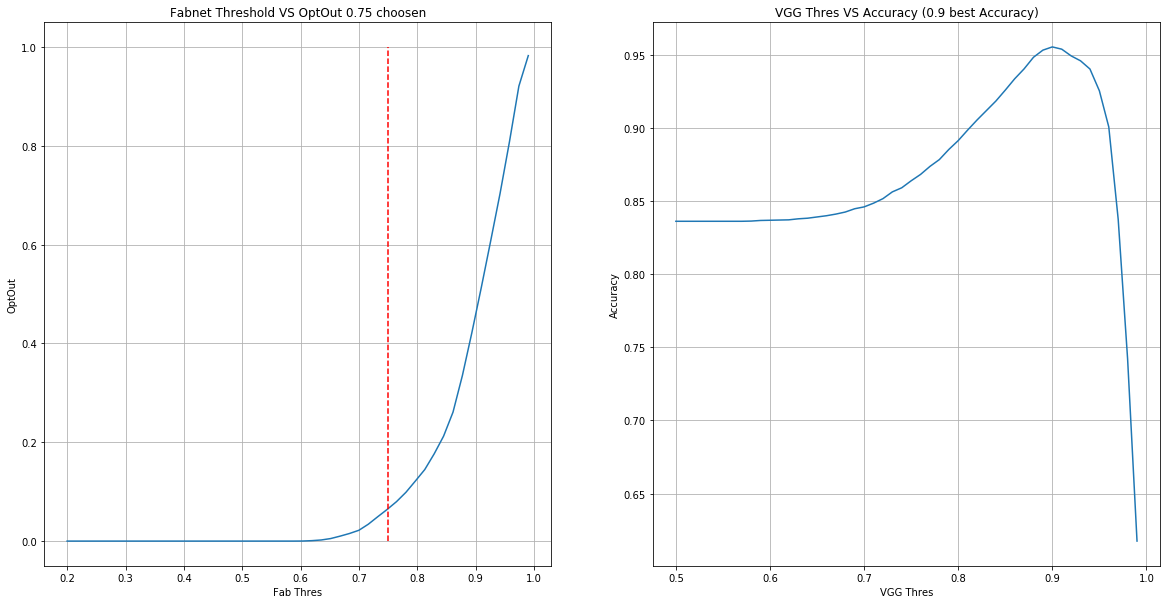

In [64]:
# plot the two images 
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].plot(T_f_rng, acc_opt[0, :])
ax[0].grid(b=True)
ax[0].plot([0.75, 0.75], [0, 1], 'r--')
ax[0].set_title('Fabnet Threshold VS OptOut 0.75 choosen')
ax[0].set_xlabel('Fab Thres')
ax[0].set_ylabel('OptOut')

n_tcks = 10
vgg_acc = acc_img[:, np.argmin(np.abs(T_f_rng - 0.75))]
ax[1].plot(T_v_rng, vgg_acc)
ax[1].grid(b=True)
#ax[1].plot([0.88, 0.88], [0, 1], 'r--')
ax[1].set_title('VGG Thres VS Accuracy (0.9 best Accuracy)')
ax[1].set_xlabel('VGG Thres')
ax[1].set_ylabel('Accuracy')

#u.add_colorbar(ax[1].imshow(acc_opt))

plt.show()



In [ ]:
ax[1].set_xticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
ax[1].set_yticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
# ... and label them with the respective list entries
ax[1].set_xticklabels([f'{x:0.2f}' for x in np.linspace(T_f_rng[0], T_f_rng[-1], n_tcks)], rotation=90)
ax[1].set_yticklabels([f'{x:0.2f}' for x in np.linspace(T_v_rng[0], T_v_rng[-1], n_tcks)])
ax[1].set_title('Average Accuracy')
ax[1].set_xlabel('Fab Thres')
ax[1].set_ylabel('VGG Thres')



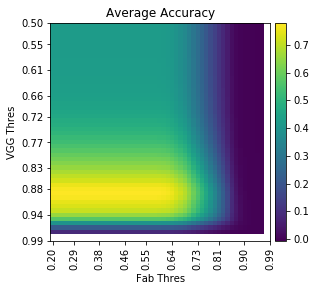

In [45]:
_, ax = plt.subplots(nrows=1, ncols=1)
u.add_colorbar(ax.imshow((acc_img / (acc_opt)**5))
ax.set_xticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
ax.set_yticks(np.linspace(0, len(T_v_rng)+1, n_tcks).astype(np.int32))
# ... and label them with the respective list entries
ax.set_xticklabels([f'{x:0.2f}' for x in np.linspace(T_f_rng[0], T_f_rng[-1], n_tcks)], rotation=90)
ax.set_yticklabels([f'{x:0.2f}' for x in np.linspace(T_v_rng[0], T_v_rng[-1], n_tcks)])
ax.set_title('Average Accuracy')
ax.set_xlabel('Fab Thres')
ax.set_ylabel('VGG Thres')

plt.show()



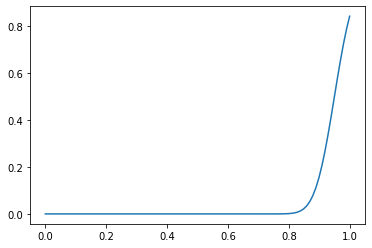

In [58]:
from scipy.stats import norm

x = np.linspace(0, 1, 100)
y = norm.cdf(x, 0.95, 0.05)

plt.plot(x,y)
plt.show()

# recall @ 1

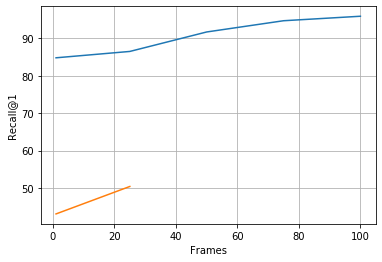

In [3]:
x = [1, 25, 50, 75, 100]
y_metric = [84.8,86.5,91.7,94.7,95.9]
y_nometric = [43.1, 50.43, np.nan, np.nan, np.nan]

plt.plot(x, y_metric, label='metric learning')
plt.plot(x, y_nometric, label='no metric learning')
plt.xlabel('Frames')
plt.ylabel('Recall@1')
plt.grid(b=True)
plt.show()